In [1]:
# imports
import numpy as np
import numpy.linalg as la
import numpy.random as rnd
import matplotlib.pyplot as plt

## Auxiliary class for activation functions and their derivatives

In [2]:
class NNUtils():
    @staticmethod 
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @classmethod 
    def dsigmoid(cls, x):
        sig = lambda x : (1 / (1 + np.exp(-x)))
        return np.multiply(cls.sigmoid(x), np.ones(len(x))-cls.sigmoid(x))
    
    @staticmethod 
    def softmax(x):
        if np.sum(np.exp(x)) == 0:
            print(x)
        return np.divide(np.exp(x),np.sum(np.exp(x)))
    
    @staticmethod 
    def RELU(x):
        return np.maximum(x, 0)
    
    @staticmethod 
    def dRELU(x):
        return [(xi > 0) * 1 for xi in x]

## Neural Network

We train a neural network with a specified format using backpropagation and gradient descent.

Parameters:

|   	|   	|   	|   	|   	|
|---	|---	|---	|---	|---	|
|   **format**	|   number and size of layers	|   array	|   required	|   	|
|   **eta**	|   learning rate	|   float	|   optional	|   	|
|   	|   	|   	|   	|   	|

        

In [3]:
class Neural_Network(object):
    """
    Feedforward Neural Network
    """
    
    def __init__(self, format, eta=0.05):
        self.__format = format              # vector of shapes
        self.__l = len(format)-1            # number of layers-1
        self.__eta = eta
        
        # initialise random parameters
        self.__w = []
        self.__b = []
        for i in range(self.__l):
            self.__w.append(rnd.randn(self.__format[i+1], self.__format[i]))
            self.__b.append(rnd.rand(self.__format[i+1]))
            #self.__b.append(np.zeros((self.__format[i+1], 1)).reshape(self.__format[i+1],))
        self.i = 0
        
    def _activate(self, a, i):
        return NNUtils.sigmoid(np.dot(self.__w[i], a) + self.__b[i])
    
    def cost(self, x, y):
        if x.ndim > 1:
            n = x.shape[1]
        else:
            x = x.reshape([len(x), 1])
            n = 1
        costvect = np.zeros(n)
        for i in range(n):
            #costvect[i] = la.norm(y[:,i]-self.evaluate(x[:,i]))
            costvect[i] = -(1/n)*np.dot(y[:,i],np.log(self.evaluate(x[:,i])))
        return np.sum(costvect)/np.float(n)
    
    def evaluate(self, x):
        a = x
        for i in range(self.__l):
            a = self._activate(a, i)
        return a
    
    def backpropagate(self, x, y, eta=None):
        if eta:
            self.__eta = eta
        a = [x]
        d = []
        
        # Forward step
        for i in range(self.__l):
            z = np.dot(self.__w[i], a[i])+self.__b[i]
            a.append(NNUtils.sigmoid(z))
            d.append(NNUtils.dsigmoid(z))    
            
        # Backpropagate
        delta = [np.multiply(d[self.__l-1], a[-1]-y)]
        for j in range(self.__l-2, -1, -1):
            delta.insert(0, np.multiply(d[j], np.dot(self.__w[j+1].transpose(), delta[0])))
            
        # Gradient step
        for j in range(self.__l-1, -1, -1):
            self.__w[j] -= self.__eta*np.outer(delta[j], a[j])
            self.__b[j] -= self.__eta*delta[j]
            
    def train(self, X, Y, w=None, b=None, iters=100000):
        if w:
            self.__w = w
        if b:
            self.__b = b
        n = X.shape[1]
        costs = np.zeros(iters)
        for i in range(iters):
            if self.i % (iters/10) == 0:
                print(f"{self.i*100/iters}% done")
            self.i = self.i+1
            
            for j in range(n):
                x, y = X[:, j], Y[:, j]
                self.backpropagate(x, y)
            costs[i] = self.cost(X, Y)
        return costs

## Evaluation of implementation on a toy data set

In [4]:
# Create dataset (Example from Deep Learning: An introduction for applied mathematicians, Catherine F. Higham, Desmond J. Higham)
X = np.array([[0.1, 0.3, 0.1, 0.6, 0.4, 0.6, 0.5, 0.9, 0.4, 0.7], [0.1, 0.4, 0.5, 0.9, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6]])
y = np.concatenate((np.ones(5), np.zeros(5))).reshape(1, 10)

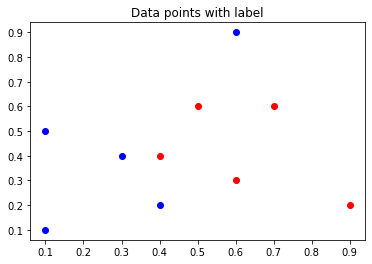

In [5]:
# plot data set with colour representing the label
plt.title("Data points with label")
plt.scatter(X[0,:5], X[1,:5], color="blue")
plt.scatter(X[0,5:], X[1,5:], color="red")
plt.show()

In [6]:
# training the neural network
network = Neural_Network([2, 5, 5, 1])
cost = network.train(X, y, iters=10000)

0.0% done
10.0% done
20.0% done
30.0% done
40.0% done
50.0% done
60.0% done
70.0% done
80.0% done
90.0% done


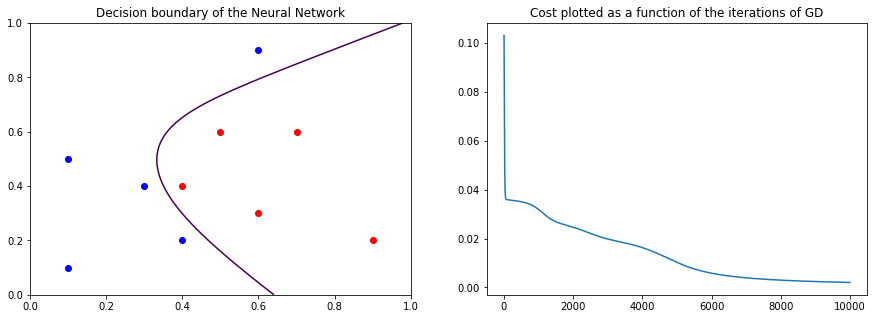

In [7]:
# visualising the decision boundary and graph of cost function
xx = np.linspace(0, 1, 100)
yy = np.linspace(0, 1, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = np.zeros(XX.shape)
for i in range(100):
    for j in range(100):
        ZZ[j,i]= network.evaluate(np.array([xx[i], yy[j]]))[0]
        
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title("Decision boundary of the Neural Network")
ax[0].contour(XX,YY,ZZ, levels=[0.5])
ax[0].scatter(X[0,:5], X[1,:5], color='blue')
ax[0].scatter(X[0,5:], X[1,5:], color='red')

ax[1].set_title("Cost plotted as a function of the iterations of GD")
ax[1].plot(cost[1:])
plt.show()